# Este é o terceiro projeto proposto pelo curso de data science da TripleTen


# Título: O que vende um carro?

Este projeto foi realizado com o objetivo de testar conhecimentos em python, pandas, pyplot,Matplotlib, pré-processamento de dados em geral.

## Introdução

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

Bibliotecas necessárias para iniciar o projeto:

In [517]:
# Carregando todas as bibliotecas
import pandas as pd #importando pandas como pd
import matplotlib.pyplot as plt # importando matplotlib como plt

### Carregue dados

lendo os dados e salvando o dataFrame em df

In [518]:
df = pd.read_csv('vehicles_us.csv')

### Explorando os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

Informações gerais:

In [519]:
# imprimindo as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [520]:
print(f'Linhas: {df.shape[0]}, Colunas: {df.shape[1]}')
# Quantidade de linhas e colunas do DataFrame

Linhas: 51525, Colunas: 13


In [521]:
# imprimindo uma amostragem dos dados em 10 linhas
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42472,4200,NaN,nissan sentra,excellent,NaN,gas,120000.0,automatic,sedan,NaN,NaN,2019-04-17,6
28283,6500,2001.0,jeep wrangler,good,6.0,gas,186000.0,manual,offroad,grey,1.0,2018-10-02,48
13757,8595,2010.0,nissan murano,excellent,6.0,gas,NaN,automatic,SUV,grey,1.0,2019-03-26,30
12195,3500,2002.0,jeep liberty,excellent,6.0,gas,238000.0,automatic,SUV,silver,NaN,2018-11-19,37
13382,6800,2004.0,gmc sierra,good,8.0,gas,127300.0,automatic,truck,black,1.0,2018-06-24,24
51071,5300,2001.0,toyota tundra,good,8.0,gas,185000.0,automatic,pickup,purple,1.0,2019-04-08,86
27015,5699,2004.0,ford f150,good,8.0,gas,105000.0,automatic,truck,blue,NaN,2018-11-30,29
2813,13995,2009.0,gmc sierra 1500,excellent,8.0,gas,129986.0,automatic,truck,grey,1.0,2018-09-14,43
18268,28990,2011.0,ford econoline,good,10.0,gas,17037.0,automatic,bus,white,NaN,2018-07-27,51
4465,14995,2013.0,honda cr-v,excellent,4.0,gas,NaN,automatic,wagon,brown,1.0,2018-09-21,45


Nas informações gerais notamos que exitem 5 colunas com dados ausentes e algumas colunas também estão com tipos de dados inapropriadas. 
Na amostragem dos dados podemos observar 10 linhas escolhidas aleatóriamente, algumas colunas tem dados ausentes, a coluna do ano do carro está em casa decimal ao invés de números inteiros. 

Agora vamos observar quais são as colunas possuem dados ausentes e a quantidade:

In [522]:
df.isna().sum()
# total de valores nulos em cada coluna

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

As colunas que possuem dados ausentes: model_year (3619), cylinders (5260), odometer (7892), paint_color (9267) e is_4wd (25953). Não observo simetria nos dados ausentes, cada coluna possue uma quantidade diferente de dados faltantes. Sendo is_4wd o maior deles.

In [523]:
print((df['is_4wd'].isna().sum()*100/len(df)).round(3),'%') 

50.37 %


Porcentagem de valores nulos da coluna is_4wd com relação ao total de linhas em df é de 50.37 %

In [524]:
# Verificar a distribuição em todo o conjunto de dados
for col in ['price', 'model_year', 'model', 'condition','cylinders','fuel','odometer',
            'transmission','type','paint_color','is_4wd','date_posted','days_listed']:
    print(df[col].value_counts(dropna=False) / len(df))
    print('========')

1        0.015488
6995     0.013954
5995     0.012712
4995     0.012111
3500     0.012033
           ...   
58500    0.000019
3993     0.000019
32987    0.000019
3744     0.000019
7455     0.000019
Name: price, Length: 3443, dtype: float64
NaN       0.070238
2013.0    0.068879
2012.0    0.067307
2014.0    0.066919
2011.0    0.065502
            ...   
1948.0    0.000019
1961.0    0.000019
1936.0    0.000019
1949.0    0.000019
1929.0    0.000019
Name: model_year, Length: 69, dtype: float64
ford f-150                           0.054265
chevrolet silverado 1500             0.042135
ram 1500                             0.033964
chevrolet silverado                  0.024668
jeep wrangler                        0.021718
                                       ...   
ford f-250 super duty                0.004677
acura tl                             0.004580
kia sorento                          0.004580
nissan murano                        0.004561
mercedes-benz benze sprinter 2500    0.000796


In [525]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


   Na coluna price, observamos valores incomuns, na coluna is_4wd observamos apenas o valor 1 para metade das linhas, como a coluna corresponde a valores booleanos acredito que os valores NaN são correspondentes a valores 0. Todas as colunas com dados ausentes precisam ser tratadas.

### Conclusões e próximos passos

O dataframe possue 13 colunas com informações diversas sobre os carros para venda, poderemos analisar com detalhes quais fatores influenciaram o preço de um veículo. Para prosseguir com a análise precisamos adequar os dados e corrigí-los, então precisaremos ver se os dados possuem valores com duplicatas e também precisaremos checar e preencher dados ausentes para cada coluna observada. Após esses passos teremos os dados limpos para seguir a análise.


### Verificando duplicatas
Checando existência de duplicatas em nossos dados:

In [526]:
# Verificando duplicatas
df.duplicated().sum()

0

Os dados não possuem valores duplicados.

## Valores ausentes

Vamos verificar cada coluna que possuem dados ausentes (model_years, cylinders, odometer, paint_color e is_4wd)   eparadamente e baseado em hipóteses e analises vamos decidir oque fazer para cada caso.

### Coluna `model_year`

In [527]:
df['model_year'].isna().sum() #temos 3619 valores ausentes

3619

In [528]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [529]:
model_year_median = df['model_year'].median()
model_year_mean = df['model_year'].mean()
print(f'valor da mediana: {model_year_median}')
print(f'valor da média: {model_year_mean}')

valor da mediana: 2011.0
valor da média: 2009.75046966977


Como a mediana é menos sensível a outliers, vamos substituir os valores ausentes pelo valor da mediana.

In [530]:
df['model_year'] = df['model_year'].fillna(df['model_year'].median()) #substituindo pela mediana

In [531]:
df['model_year'].isna().sum() #checando se a coluna ainda possue dados ausentes

0

### Coluna `cylinders`

In [532]:
df['cylinders'].isna().sum() #temos 5260 valores ausentes

5260

In [533]:
df['cylinders'].describe() # podemos perceber pelo describe que a média e a mediana tem praticamente mesmos valores

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [534]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [535]:
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].median()) # substituindo pela mediana

In [536]:
df['cylinders'].isna().sum() # checando se a coluna ainda possue dados ausentes

0

In [537]:
df['cylinders'].value_counts()

6.0     20960
8.0     15844
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

### Coluna `odometer`

In [538]:
df['odometer'].isna().sum() # temos 7892 valores ausentes

7892

In [539]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [540]:
df['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
138580.0      1
94624.0       1
123321.0      1
202627.0      1
139573.0      1
Name: odometer, Length: 17762, dtype: int64

In [541]:
df['odometer'] = df['odometer'].fillna(df['odometer'].median()) # substituindo pela mediana

In [542]:
df['odometer'].isna().sum() # checando se a coluna ainda possue dados ausentes

0

### Coluna `paint_color`

In [543]:
df['paint_color'].isna().sum() # temos 9267 valores ausentes

9267

In [544]:
df['paint_color'].describe() # neste caso a coluna é preenchida com string

count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

In [545]:
df['paint_color'].value_counts() # esses são as cores e o número de linhas que temos para cada

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Como os dados desta coluna são categóricos não podemos preenche-los com valores como média ou mediana, então podemos preencher com uma string sem texto ou com o texto unknown (desconhecido). Neste caso eu vou escolher colocar como uma cor desconhecida colocando nas linhas NaN o valor de unknown.

In [546]:
df['paint_color'] = df['paint_color'].fillna('unknown') # substituindo para unknown
df['paint_color'].isna().sum() # checando se os dados foram preenchidos

0

In [547]:
df['paint_color'].value_counts() # checando a nova lista de valores da coluna paint_color

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

### Coluna `is_4wd`

In [548]:
df['is_4wd'].isna().sum() # temos 25953 valores ausentes

25953

In [549]:
df['is_4wd'].describe() # podemos perceber que todos os dados preenchidos são iguais a 1

count    25572.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: is_4wd, dtype: float64

In [550]:
df['is_4wd'].value_counts() # esta coluna só tem valor 1 e NaN, uma coluna booleana  o outro valor NaN é 0

1.0    25572
Name: is_4wd, dtype: int64

In [551]:
df['is_4wd'] = df['is_4wd'].fillna(0)
df['is_4wd'].isna().sum()

0

In [552]:
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

### Atualização do dataframe com o preenchimento dos dados ausentes

In [553]:
df.info() # todas as colunas estão com todos os dados preenchidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Corrijindo os tipos de dados

In [554]:
 df['model_year'] = df['model_year'].astype('int') # corrigindo a coluna model_year para inteiro

In [555]:
df['is_4wd'] = df['is_4wd'].astype('int') # corrigindo a coluna is_4wd para inteiro

In [556]:
df['date_posted'] = pd.to_datetime(df['date_posted'],format='%Y-%m-%d') # corrigindo a coluna date_posted para datetime

Fizemos as correções dos tipos de dados que representam cada coluna.

## Enriquecendo os dados

Adicionando novas colunas aos dados para tornar a análise mais robusta.

In [557]:
# Adicionando colunas com valores de dia da semana,  mês e ano da data postada.

# Dia da semana de postagem
df['weekday_posted'] = df['date_posted'].dt.weekday

# Mês de postagem
df['month_posted'] = df['date_posted'].dt.month

# Ano de postagem
df['year_posted'] = df['date_posted'].dt.year

In [558]:
# Adicionando a idade do veículo quando a propaganda foi colocada
df['car_age'] = df['year_posted'] - df['model_year']

Quando `car_age` for 0, significa que o carro esta no primeiro ano de uso, se tem 1 ano significa que ele tem entre 12 meses a 23 meses de uso, logo podemos somar df['car_age'] + 1 no denominador.

In [559]:
# Adicionando a quilometragem média por ano
df['km_per_year'] = df['odometer']/(df['car_age'] + 1)

Na coluna `condition`, vamos substituir os valores de string por uma escala numérica:

novo = 5

como novo = 4

excellente = 3

bom = 2

razoável = 1

sucata = 0

In [560]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [561]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente
def condition_car(item):
    if item == 'new':
        return item.replace('new','5')
    if item == 'like new':
        return item.replace('like new','4')
    if item == 'excellent':
        return item.replace('excellent','3')
    if item == 'good':
        return item.replace('good','2')
    if item == 'fair':
        return item.replace('fair','1')
    return item.replace('salvage','0')


In [562]:
df['condition'] = df['condition'].apply(condition_car)
df['condition'].value_counts()


3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [563]:
df['condition'] = df['condition'].astype(int)

## Verificando os dados limpos

Os dados estão prontos para a análise.

In [564]:
# imprimindo as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  float64       
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  float64       
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  int64         
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  weekday_posted  51525 non-null  int64         
 14  month_posted    51525 non-null  int64         
 15  ye

In [565]:
# imprimindo uma amostragem dos dados
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_age,km_per_year
51342,40990,2016,ram 1500,3,8.0,diesel,107930.0,automatic,truck,white,1,2019-03-17,23,6,3,2019,3,26982.500000
24351,15900,2010,toyota tundra,3,8.0,gas,141400.0,automatic,pickup,blue,1,2018-06-10,61,6,6,2018,8,15711.111111
11110,52000,2013,hyundai elantra,2,4.0,gas,92000.0,automatic,sedan,custom,0,2018-11-27,49,1,11,2018,5,15333.333333
41031,9950,2011,ford focus,3,4.0,gas,19300.0,automatic,wagon,unknown,0,2019-01-28,16,0,1,2019,8,2144.444444
27865,12500,2015,chevrolet malibu,3,4.0,gas,113000.0,manual,sedan,white,0,2019-03-09,52,5,3,2019,4,22600.000000
834,10500,2012,ford f-150,2,6.0,gas,123000.0,automatic,truck,silver,1,2018-11-23,73,4,11,2018,6,17571.428571
50384,44995,2017,ford f-250 super duty,3,8.0,gas,113000.0,automatic,pickup,white,1,2018-10-09,53,1,10,2018,1,56500.000000
11323,12000,2010,ford f150,3,8.0,gas,129500.0,automatic,truck,grey,1,2019-01-15,10,1,1,2019,9,12950.000000
42941,5900,2010,nissan rogue,2,4.0,gas,136000.0,automatic,SUV,silver,1,2018-08-06,22,0,8,2018,8,15111.111111
39337,11999,2005,gmc sierra,3,8.0,gas,160000.0,automatic,pickup,white,0,2018-07-12,87,3,7,2018,13,11428.571429


## Estudando os parâmetros fundamentais

Vamos construir alguns gráficos para os principais parâmetros da tabela e observar os dados para cada um deles.

Os parâmetros são:
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

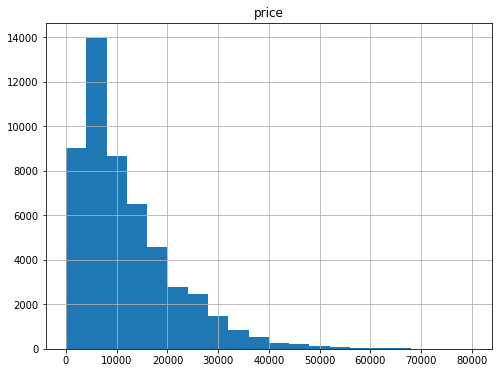

In [566]:
# preço
df.hist(column='price',bins=20, range=(0,80000),figsize=(8,6)) # podemos observar um pico em torno de 5 mil
df['price'].describe() # o maximo é um valor bem discrepante comparados com Q1 (primeiro quartil), Q2(mediana) 
# e Q3(terceiro quartil)

(-100.0, 60000.0)

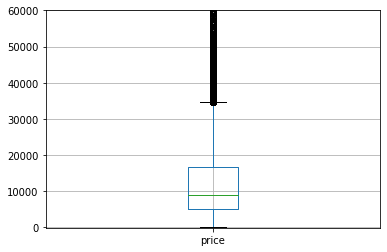

In [567]:
df.boxplot(column='price')
plt.ylim(-100,60000) # podemos observar que existem muitos valores considerados atípicos no diagrama de caixa.

count    51525.000000
mean         8.469229
std          6.079773
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

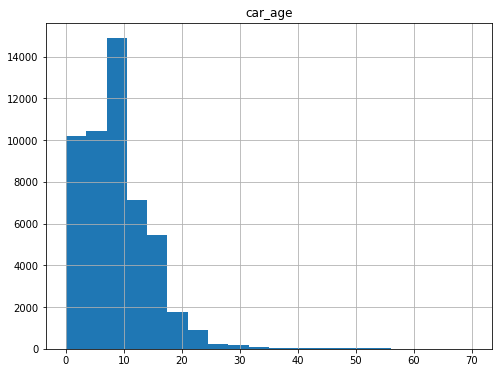

In [568]:
# idade do veiculo quando a propaganda foi colocada
df.hist(column='car_age',bins=20,range=(0,70),figsize=(8,6)) # podemos observar um pico em torno de 7 a 8 anos
df['car_age'].describe() # a idade máxima é de 110 anos que provavelmente é um valor atípico

(0.0, 40.0)

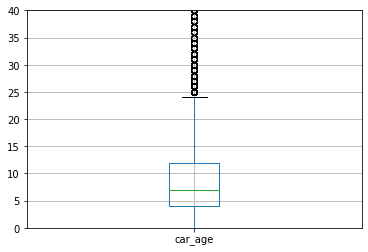

In [569]:
df.boxplot(column='car_age') # carros acima de 25 anos no diagrama de caixa está fora do Q3 + 1.5IQR
plt.ylim(0,40)

count     51525.000000
mean     115162.352179
std       59909.264385
min           0.000000
25%       79181.000000
50%      113000.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

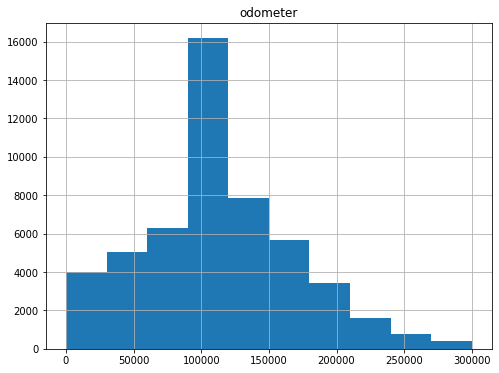

In [570]:
# quilometragem
df.hist(column='odometer',range=(0,300000),figsize=(8,6)) # entre 100 mil a 120 mil vemos um pico
df['odometer'].describe() # o valor máximo é de quase 1 milhão de km rodados

(-2000.0, 500000.0)

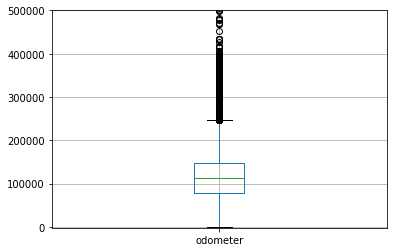

In [571]:
df.boxplot(column='odometer')
plt.ylim(-2000,500000) # podemos observar que valores acima de 250 mil esta sendo considerado outliers

count     51525.000000
mean      15537.649192
std       12341.655297
min           0.000000
25%        9411.764706
50%       13214.444444
75%       18394.500000
max      373200.000000
Name: km_per_year, dtype: float64

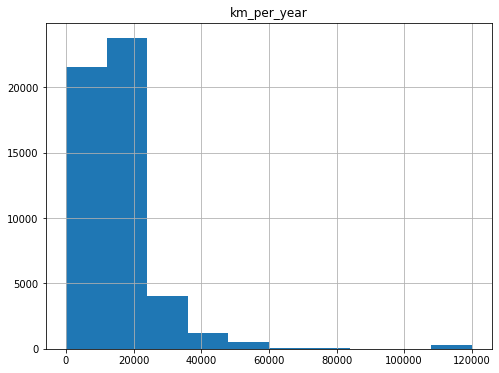

In [572]:
# quilometragem por ano
df.hist(column='km_per_year',range=(0,120000),figsize=(8,6)) # na km por ano podemos ver um pico em torno da média
df['km_per_year'].describe() # podemos observar um valor máximo de 373 mil km rodados em um ano. Um valor atípico

(-1110.0, 40000.0)

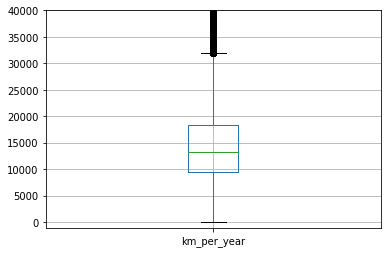

In [573]:
df.boxplot(column='km_per_year') # Neste diagrama de caixa podemos observar para valores acima de 33 mil 
plt.ylim(-1110,40000)                # são calculados como outliers

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

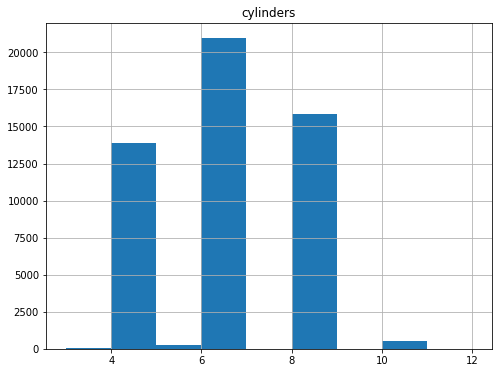

In [574]:
# numero de cilindros
df.hist(column='cylinders',bins=9,range=(3,12),figsize=(8,6)) # no caso de cilindros de um carro esses números são 
# menos variavéis pois dependem da mecanica e fabricação do carro por isso os valores se comportam bem.
#podemos perceber que existem mais carros de 6 cilindros nos dados
df['cylinders'].describe() # os valores de min 3 e max 12 são valores típicos

(0.0, 14.0)

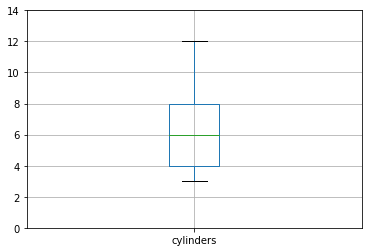

In [575]:
df.boxplot(column='cylinders') # como podemos esperar devido o tipo de dado, não exitem pontos de outliers nesta coluna.
plt.ylim(0,14)

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

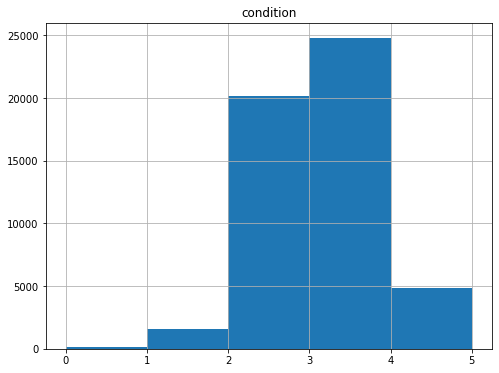

In [576]:
# condição: embora tenha sido substituido por números de 0 a 5 sabemos que estes numeros na verdade 
# representa strings que dizem a condição física do estado de conservação do carro.
df.hist(column='condition',bins=5,figsize=(8,6)) # podemos observar que a maioria dos carros estão na condição 3 e 4
df['condition'].describe()

## Valores atípicos

Dado os resultados acima, podemos dizer que `price`,`year` e `odometer` ( ou `km_per_year`) possuem valores atípicos traçados no boxplot. Vamos criar um DataFrame sem aqueles valores atípicos (Valores atípicos podem ser identificados se você definir os limites inferior/superior para intervalos normais de valores).

In [577]:
# Determinando o limite inferior para valores atípicos
list_lower_range=[]
for index in ['price','car_age','odometer','km_per_year']:
    Q1 = df[index].quantile(0.25) 
    Q3 = df[index].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    list_lower_range.append(lower_range)
print(list_lower_range)
# embora esses valores sejam negativos eles são apenas calculos teoricos, sabemos que 
# os valores mínimos são 0 (com excessão de price que é 1)
# podemos ver isso no diagrama de caixa e também nos valores min do describe.

[-12758.5, -8.0, -21859.0, -4062.338235294117]


In [578]:
# Determinando o limite superior para valores atípicos
list_lower_range=[]
for index in ['price','car_age','odometer','km_per_year']:
    Q1 = df[index].quantile(0.25) 
    Q3 = df[index].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q3 + (1.5*IQR)
    list_lower_range.append(lower_range)
print(list_lower_range)
# o valor calculado para os limites superior são consistente com o que vimos no boxplot.

[34597.5, 24.0, 247581.0, 31868.60294117647]


In [579]:
# Armazenando os dados sem os valores atípicos em um DataFrame separado
# vamos pegar uma fatia dos dados para os dados que se encontram ate os limites superiores calculados acima
# como os km por hora sao calculados a partir da quilometragem vamos utilizar apenas odometer para fatiar os dados.
df_slice = df.query('price <= @list_lower_range[0] and car_age <= @list_lower_range[1] and odometer <= @list_lower_range[2]')
print(df_slice.shape) # linhas e colunas
len(df_slice)/len(df) # porcentagem da tabela que pegamos com relação a original

(48055, 18)


0.9326540514313441

## Estudando os parâmetros fundamentais sem valores atípicos

Usando os dados filtrados para fazer novos gráficos e vamos comparar com os anteriores

count    48055.000000
mean     11266.146374
std       7831.190507
min          1.000000
25%       5000.000000
50%       8995.000000
75%      15995.000000
max      34595.000000
Name: price, dtype: float64

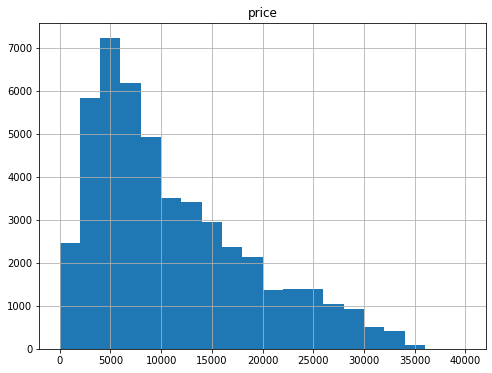

In [580]:
df_slice.hist(column='price',bins=20, range=(0,40000),figsize=(8,6))

df_slice['price'].describe()

Basicamente os histogramas de antes e depois se comportam iguais, porém os valores máximos do preço são em torno de 35mil.

count    48055.000000
mean         8.152117
std          4.991048
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         24.000000
Name: car_age, dtype: float64

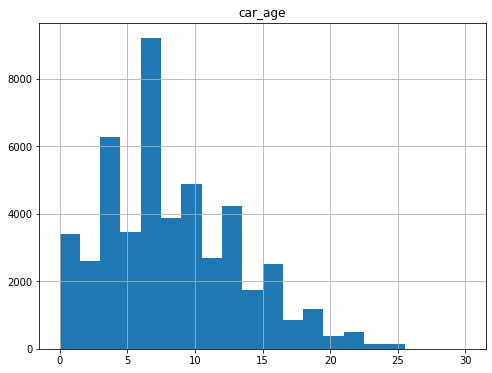

In [581]:
df_slice.hist(column='car_age',bins=20,range=(0,30),figsize=(8,6))
df_slice['car_age'].describe()

O histograma para as idades dos carros também se comportam iguais com o limite max de 25 anos

count     48055.000000
mean     112966.318635
std       51730.625195
min           0.000000
25%       81522.000000
50%      113000.000000
75%      144380.500000
max      247548.000000
Name: odometer, dtype: float64

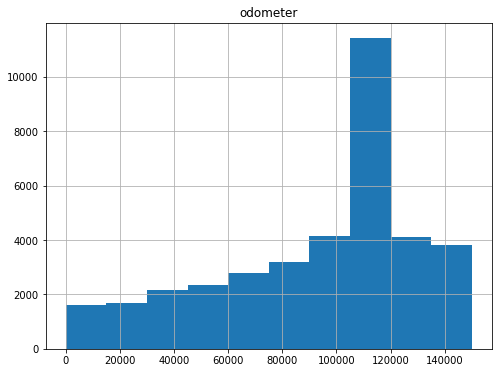

In [582]:
df_slice.hist(column='odometer',range=(0,150000),figsize=(8,6))
df_slice['odometer'].describe()

O valor máximo após retirar valores discrepantes foi para 247 mil.

count     48055.000000
mean      15271.117253
std       11209.217282
min           0.000000
25%        9416.666667
50%       13125.000000
75%       18111.625000
max      195700.000000
Name: km_per_year, dtype: float64

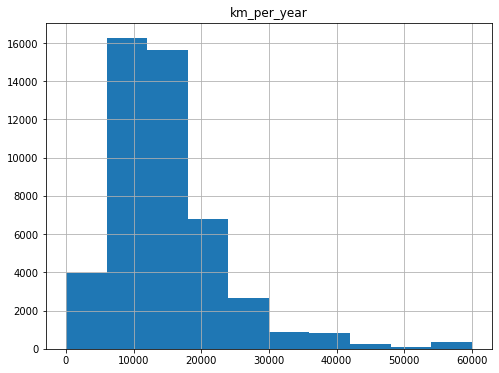

In [583]:
df_slice.hist(column='km_per_year',range=(0,60000),figsize=(8,6))
df_slice['km_per_year'].describe()

Podemos perceber que a km máxima por ano agora é de 195 mil. 

## Tempo de vida das propagandas

Vamos estudar quantos dias propagandas foram exibidas (`days_listed`) e calcular a média e a mediana.

count    48055.000000
mean        39.537821
std         28.214071
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
média: 39.5378212464884, mediana: 33.0


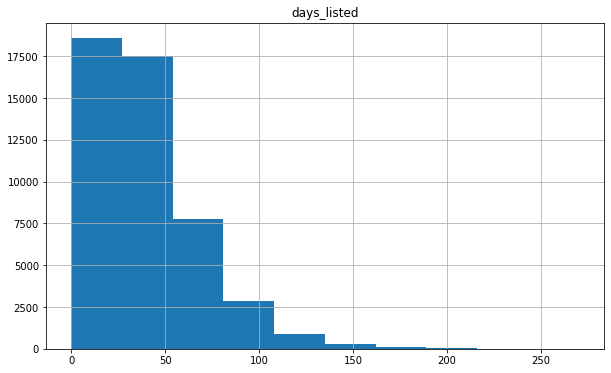

In [584]:
print(df_slice['days_listed'].describe()) 
# podemos perceber que os valores minimo é 0 e o mãximo é 271 dias.
# a média tem 39 dias, mediana 33 dias
df_slice.hist(column='days_listed',range=(0,270),figsize=(10,6)) 
# vamos olhar para o histograma e observar a distribuição de dias dos dados
days_listed_mean = df_slice['days_listed'].mean()
days_listed_median = df_slice['days_listed'].median()
print(f'média: {days_listed_mean}, mediana: {days_listed_median}')

No histograma existe um número muito grande próximo de 0 a 25 dias, e 17500 veiculos de 25 a 50 dias após esta margem os números começam a cair significativamente, e temos valores muito pequenos acima de 150 dias. Oque podemos verificar é quais tipos de carro são os que estão acima de 150 dias e quais estão proximos abaixo de 50 dias para descobrir se exite algum padrão.

In [585]:
# para valores iguais ou maiores de 150 dias
df_days_longer = df_slice.query('days_listed >= 150')
print(df_days_longer.shape)
df_days_longer.sample(3)

(237, 18)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_age,km_per_year
18357,7990,2006,ford econoline,2,6.0,gas,105429.0,automatic,van,white,0,2019-02-25,163,0,2,2019,13,7530.642857
32709,4950,2005,chevrolet suburban,2,8.0,gas,235670.0,automatic,SUV,blue,1,2018-07-03,157,1,7,2018,13,16833.571429
18509,7500,2016,nissan sentra,4,4.0,gas,23998.0,automatic,sedan,grey,0,2018-11-18,163,6,11,2018,2,7999.333333


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

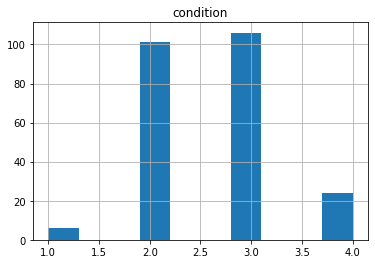

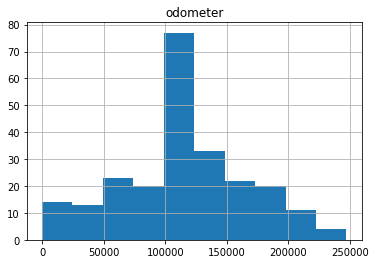

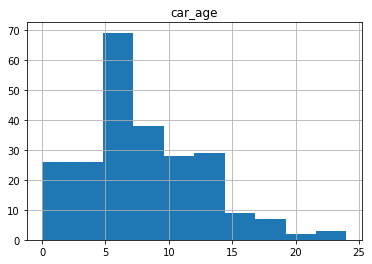

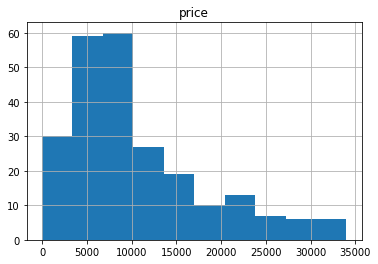

In [586]:
df_days_longer.hist('condition') # a maioria esta no 2 e 3
df_days_longer.hist('odometer') # a maioria esta acima de 100 mil km rodados
df_days_longer.hist('car_age') # a maioria tem mais de 5 anos
df_days_longer.hist('price') # maioria em torno de 5 a 10 mil
#df_days_longer['type'].value_counts()
#df_days_longer['transmission'].value_counts()
#df_days_longer['paint_color'].value_counts()

In [587]:
# para valores iguais ou menores que 50 dias
df_days_lower = df_slice.query('days_listed <= 50')
print(df_days_lower.shape)
df_days_lower.sample(3)

(34719, 18)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,car_age,km_per_year
13356,22000,2018,toyota tundra,0,8.0,gas,113000.0,automatic,pickup,grey,0,2018-06-29,45,4,6,2018,0,113000.000000
12231,1,2014,toyota camry,4,4.0,gas,113000.0,automatic,sedan,red,0,2018-11-17,18,5,11,2018,4,22600.000000
3270,2975,2003,volkswagen jetta,2,4.0,gas,113000.0,automatic,sedan,grey,0,2019-01-20,20,6,1,2019,16,6647.058824


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

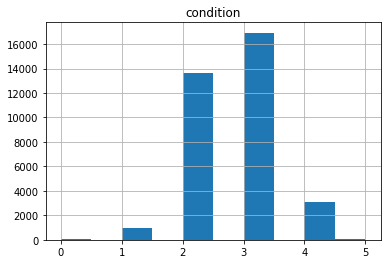

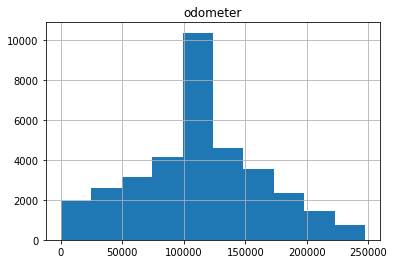

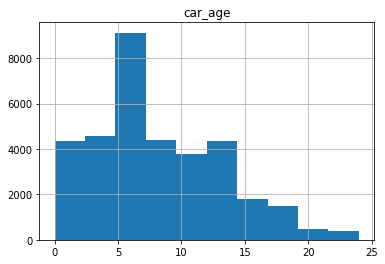

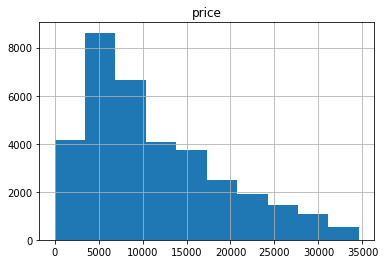

In [588]:
df_days_lower.hist('condition') # para todos as colunas os valores estão semelhantes
df_days_lower.hist('odometer') 
df_days_lower.hist('car_age') 
df_days_lower.hist('price')
#df_days_lower['type'].value_counts()
#df_days_lower['transmission'].value_counts()
#df_days_lower['paint_color'].value_counts()

Para quantidade de dias de anúncio, os parametros se mantiveram semelhantes.

## Média de preços por cada tipo de veículo

Analizando o número de propagandas e o preço médio para cada tipo de veículo.

                    price
type                     
bus          19013.250000
truck        15204.355988
pickup       15135.472365
offroad      14410.591160
coupe        13486.747535
convertible  12819.307910
other        10512.364407
SUV          10491.031604
wagon         9022.176985
van           8896.221837
mini-van      8084.955224
sedan         6996.041284
hatchback     6851.938247
---------------------------------------
sedan          11966
SUV            11834
truck          11006
pickup          6224
coupe           2028
wagon           1486
mini-van        1139
hatchback       1004
van              577
convertible      354
other            236
offroad          181
bus               20
Name: type, dtype: int64


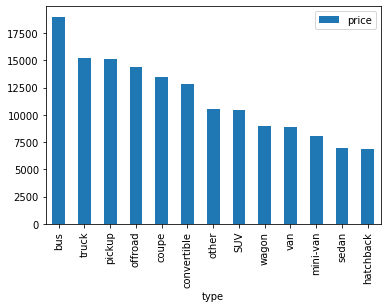

In [589]:
table_type_price = df_slice.pivot_table(index='type', values='price', aggfunc='mean').sort_values(by='price',ascending=False)
# ou
df_slice.groupby('type')['price'].mean()
print(table_type_price)
table_type_price.plot(kind='bar')
print('---------------------------------------')
print(df_slice['type'].value_counts()) # sedan, SUV e truck são os tipos com mais propagandas



<AxesSubplot:>

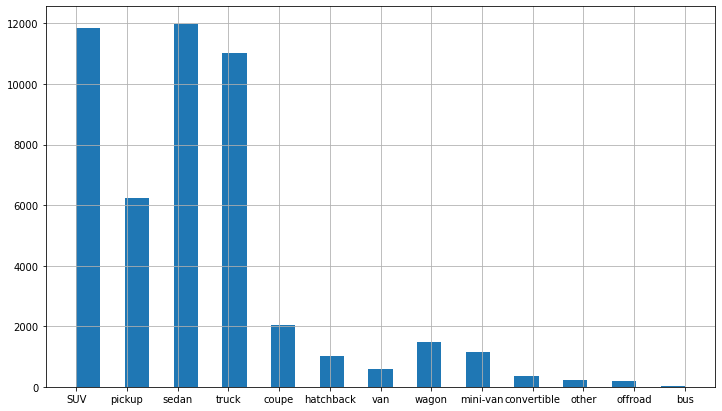

In [590]:
df_slice['type'].hist(bins=25,figsize=(12,7))

## Fatores de preço

Vamos tentar descobrir fatores que impactam nos preços.
Testaremos os dados para a idade do carro, quilometragem, condição, tipo de transmissão e cor.

In [591]:
df_type_suv =  df_slice[df_slice['type'] == 'SUV']
df_type_sedan = df_slice[df_slice['type'] == 'sedan']
df_type_truck = df_slice[df_slice['type'] == 'truck']

correlação para SUV: -0.5735142684921837
correlação para Sedan: -0.6144936160620036
correlação para Truck: -0.5852380686794799


Text(0.5, 1.0, 'dataframe original: car_age x price')

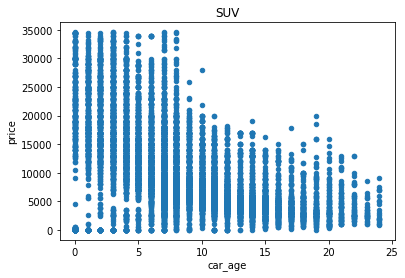

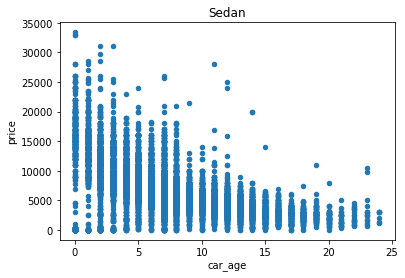

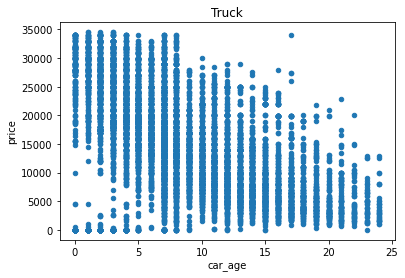

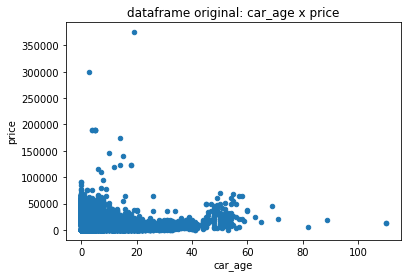

In [592]:
# se o preço depende da idade
df_type_suv.plot(x='car_age',y='price',kind='scatter')
plt.title('SUV')
print(f"correlação para SUV: {df_type_suv['price'].corr(df_type_suv['car_age'])}") # correlação idade do carro e preço para o SUV
df_type_sedan.plot(x='car_age',y='price',kind='scatter')
plt.title('Sedan')
print(f"correlação para Sedan: {df_type_sedan['price'].corr(df_type_sedan['car_age'])}") # correlação idade do carro e preço para o Sedan
df_type_truck.plot(x='car_age',y='price',kind='scatter')
plt.title('Truck')
print(f"correlação para Truck: {df_type_truck['price'].corr(df_type_truck['car_age'])}") # correlação idade do carro e preço para o Truck
# para os dados gerais
df.plot(x='car_age',y='price',kind='scatter') # todos os dados
plt.title('dataframe original: car_age x price')

correlação do SUV: -0.4721682711493697
correlação do Sedan: -0.5041698176537804
correlação do Truck: -0.39063189320627245


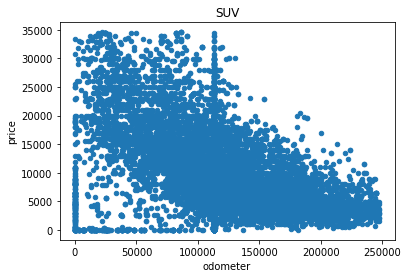

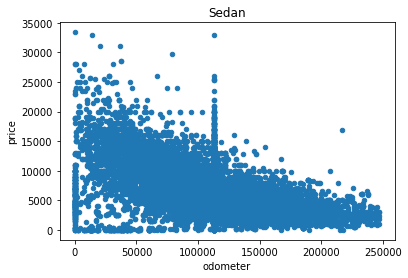

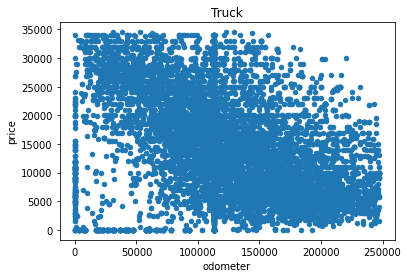

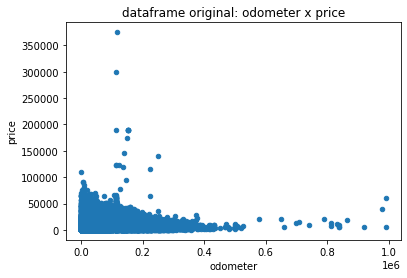

In [593]:
#se o preço depende da quilometragem
df_type_suv.plot(x='odometer',y='price',kind='scatter')
plt.title('SUV')
df_type_sedan.plot(x='odometer',y='price',kind='scatter')
plt.title('Sedan')
df_type_truck.plot(x='odometer',y='price',kind='scatter')
plt.title('Truck')

df.plot(x='odometer',y='price',kind='scatter') # todos os dados
plt.title('dataframe original: odometer x price')
print(f"correlação do SUV: {df_type_suv['price'].corr(df_type_suv['odometer'])}")
print(f"correlação do Sedan: {df_type_sedan['price'].corr(df_type_sedan['odometer'])}")
print(f"correlação do Truck: {df_type_truck['price'].corr(df_type_truck['odometer'])}")

correlação do SUV: 0.2579757264082986
correlação do Sedan: 0.2895895768537823
correlação do Truck: 0.26907560699219657


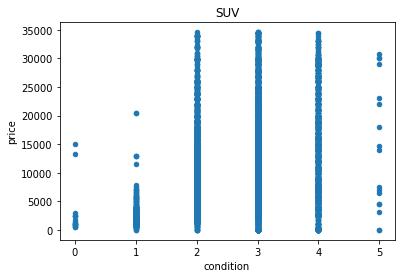

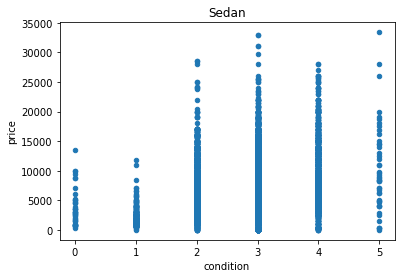

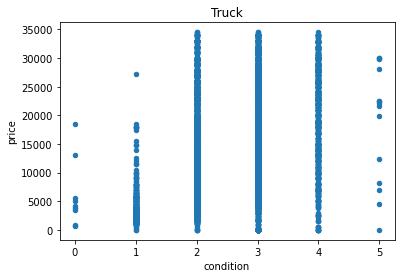

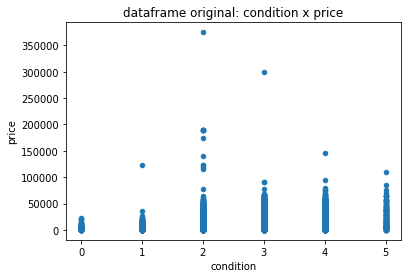

In [594]:
#se o preço depende da condição
df_type_suv.plot(x='condition',y='price',kind='scatter')
plt.title('SUV')
df_type_sedan.plot(x='condition',y='price',kind='scatter')
plt.title('Sedan')
df_type_truck.plot(x='condition',y='price',kind='scatter')
plt.title('Truck')
df.plot(x='condition',y='price',kind='scatter') # todos os dados
plt.title('dataframe original: condition x price')
print(f"correlação do SUV: {df_type_suv['price'].corr(df_type_suv['condition'])}")
print(f"correlação do Sedan: {df_type_sedan['price'].corr(df_type_sedan['condition'])}")
print(f"correlação do Truck: {df_type_truck['price'].corr(df_type_truck['condition'])}")

automatic    43882
manual        2427
other         1746
Name: transmission, dtype: int64
                     price
transmission              
other         17348.276632
automatic     11141.241602
manual         9148.994232


<AxesSubplot:xlabel='transmission'>

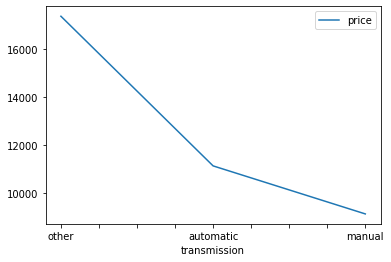

In [595]:
#se o preço depende do tipo de transmissão
print(df_slice['transmission'].value_counts()) # tipos de transmissão
table_transm_price= df_slice.pivot_table(index='transmission', values='price', aggfunc='mean').sort_values(by='price',ascending=False)
print(table_transm_price)
table_transm_price.plot()

white      9146
unknown    8652
black      7162
silver     5992
grey       4786
blue       4217
red        4071
green      1291
brown      1124
custom     1089
yellow      226
orange      211
purple       88
Name: paint_color, dtype: int64
                    price
paint_color              
yellow       14979.460177
orange       13810.763033
white        12864.997595
black        12461.887741
unknown      11395.245261
red          10806.239253
grey         10522.919975
silver       10168.031876
brown        10000.887011
blue          9755.585724
custom        9676.361800
green         8345.048025
purple        6990.977273


<AxesSubplot:xlabel='paint_color'>

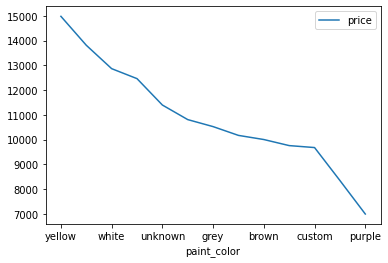

In [596]:
# se o preço depende da cor
print(df_slice['paint_color'].value_counts()) # tipos de cores
table_color_price= df_slice.pivot_table(index='paint_color', values='price', aggfunc='mean').sort_values(by='price',ascending=False)
print(table_color_price)
table_color_price.plot()

In [597]:
matrix_corr = df_slice.corr()
print(matrix_corr['price'])

price             1.000000
model_year        0.510472
condition         0.181330
cylinders         0.289901
odometer         -0.397316
is_4wd            0.332796
days_listed      -0.001414
weekday_posted   -0.001067
month_posted     -0.008197
year_posted       0.006376
car_age          -0.508435
km_per_year       0.200298
Name: price, dtype: float64


## Conclusão geral

Podemos ver através dos gráficos e analises que o preço do carro varia confome a idade sendo inversamente proporcional (onde quanto maior a idade, menor o preço da venda). Com respeito a quilometragem também temos uma relação inversamente proporcional. A relação entre a boa condição física do carro é proporcional ao preço, quanto melhor o estado do carro maior será o preço (mas neste caso a correlação ficou em torno de 0.30). Para o tipo de transmissão podemos perceber que os carros automátivos são mais caros que os carros manuais. Em relação a cor do carro podemos perceber que os carros com cores mais neutras e habituais são mais valorizados do que aqueles customizados e de cores mais vibrantes.